# Pandas

Pandas библиотека для обработки и анализа данных.Pandas делает Python мощным инструментом для анализа данных.
Pandas дает возможность строить сводные таблицы, выполнять группировки, предоставляет удобный доступ к табличным данным, а при наличии пакета matplotlib дает возможность рисовать графики на полученных наборах данных.

Основными структурами хранения данных в pandas являются Series и DataFrame.
* Series - это проиндексированный одномерный массив значений. Он похож на простой словарь типа dict, где имя элемента будет соответствовать индексу, а значение – значению записи.
* DataFrame — это проиндексированный многомерный массив значений, соответственно каждый столбец DataFrame, является структурой Series.

Pandas предоставляет широкий выбор источников данных, например:
* SQL
* Текстовые файлы
* Excel файлы
* HTML

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import re 
import numpy as np

Загрузка данных из файла csv в DataFrame


In [5]:
data = pd.read_csv('titanic.csv', index_col='PassengerId')

Для того чтобы узнать общие сведения об объекте DataFrame, можно воспользоваться методом DataFrame.info(). Благодаря этому методу можно узнать о размере объекта, о типах данных и об использовании памяти.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Просмотр первых 5 записей DataFrame:

In [8]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для извлечения отдельного столбца можно использовать конструкцию вида DataFrame['Name']

Пример Series:

In [11]:
data['Survived'].head(5)

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

Выведем названия столбцов:

In [14]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

DataFrame можно отсортировать по значению какого-нибудь из признаков. Например, по Fare (ascending=False для сортировки по убыванию):

In [15]:
data.sort_values(by='Fare', 
        ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


Удаление всех записей с отсуствующими полями (значение None)

In [29]:
data = data.dropna()

Изменить тип колонки можно с помощью метода astype. 

In [31]:
data['Age'] = data['Age'].astype('int64')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S


Для расчета средней стоимости билета можно использовать mean()

In [16]:
data['Fare'].mean()

32.204207968574636

Для расчета суммы цены всех билетов можно использовать sum()

In [18]:
data['Fare'].sum()

28693.9493

Стоимость самого дорого билета:

In [19]:
data['Fare'].max()

512.3292

Стоимость самого дешевого билета:

In [20]:
data['Fare'].min()

0.0

Получить список выживших пассажиров можно следующим образом:

In [26]:
data[(data['Survived']==1)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Получить максимальную цену билета выжившего пассажира можно следующим образом:

In [25]:
data[(data['Survived']==1)]['Fare'].max()

512.3292

Получить максимальную цену билета выжившего пассажира старше 38 лет можно следующим образом:

In [35]:
data[(data['Survived']==1) & (data['Age'] > 38)]['Fare'].max()

247.5208

Срезы в Series и DataFrame осуществляются также как и срезы массивов в Python. Индексирование по номеру осуществляется с помощью iloc()

In [38]:
data[2:5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S


In [45]:
data['Age'][10:12]

PassengerId
63    45
67    29
Name: Age, dtype: int64

Просмотр 10 записи в DataFrame

In [92]:
data.iloc[10, :]

Survived                              0
Pclass                                1
Name        Harris, Mr. Henry Birkhardt
Sex                                male
Age                                  45
SibSp                                 1
Parch                                 0
Ticket                            36973
Fare                             83.475
Cabin                               C83
Embarked                              S
Name: 63, dtype: object

Для применения функции к каждому столбцу используется apply. Метод apply можно использовать и для того, чтобы применить функцию к каждой строке. Для этого нужно указать axis=1.

In [53]:
data.apply(np.max)

Survived                           1
Pclass                             3
Name        Young, Miss. Marie Grice
Sex                             male
Age                               80
SibSp                              3
Parch                              4
Ticket                     WE/P 5735
Fare                         512.329
Cabin                              T
Embarked                           S
dtype: object

Для применения функции к каждой ячейке столбца используется map.

In [56]:
d = {0 : False, 1 : True}
data['Survived'].map(d).head()

PassengerId
2      True
4      True
7     False
11     True
12     True
Name: Survived, dtype: bool

## Группирование данных в зависимости от значений

Осуществляется с помощью функции groupby(). В функцию передается список названий столбцов, по которым будут групироваться данные.

In [93]:
gr = data[['Age', 'Fare']].groupby(['Age'])

С помощью count() подсчитывается количество купленых билетов людьми определенного возраста.

In [77]:
gr.count().head()

,Fare
Age,
0,1
1,1
2,3
3,1
4,3


С помощью describe() Создайте описательную статистику.

In [79]:
gr.describe().head()

Fare                                                                 \
    count        mean        std       min        25%     50%        75%   
Age                                                                        
0     1.0  151.550000        NaN  151.5500  151.55000  151.55  151.55000   
1     1.0   39.000000        NaN   39.0000   39.00000   39.00   39.00000   
2     3.0   62.670833  77.362673   10.4625   18.23125   26.00   88.77500   
3     1.0   26.000000        NaN   26.0000   26.00000   26.00   26.00000   
4     3.0   45.852767  33.115273   16.7000   27.85000   39.00   60.42915   

               
          max  
Age            
0    151.5500  
1     39.0000  
2    151.5500  
3     26.0000  
4     81.8583

## Построение графиков на основе данных в DataFrame

Разброс цены билета от возраста:

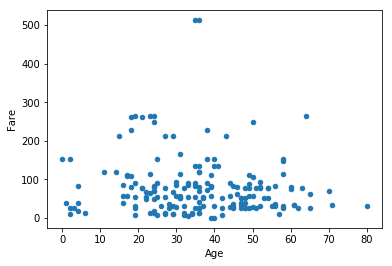

In [57]:
data.plot.scatter('Age', 'Fare')

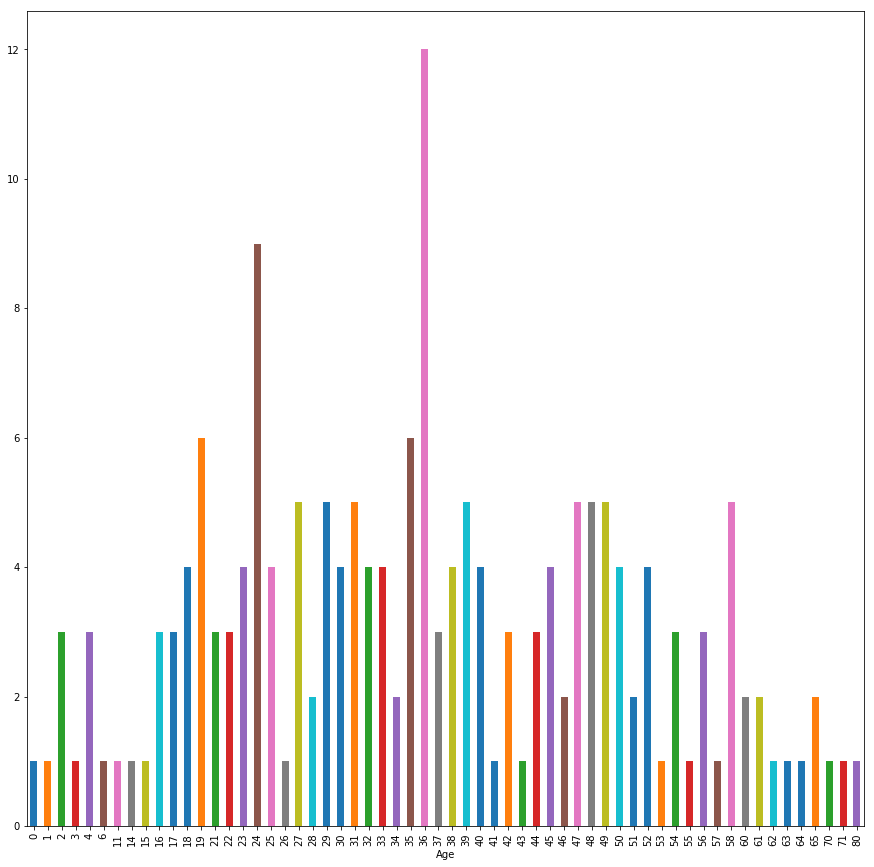

In [87]:
plt.figure(figsize=(15, 15))
gr['Age'].count().plot(kind='bar')